In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('forest cover type train.csv')
print('Shape of the train data is: ',train.shape)


Shape of the train data is:  (15120, 56)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
print('Statistical Properties of the train data are as follows: ')
print(train.describe())

Statistical Properties of the train data are as follows: 
                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.

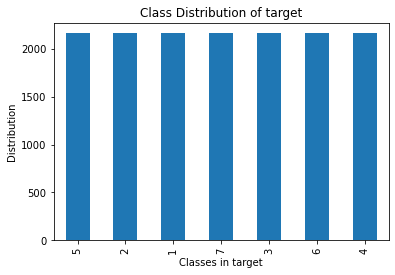

In [6]:
train.drop('Id',axis=1,inplace=True)
# Checking for the class distribution of the target
train['Cover_Type'].value_counts().plot(kind='bar')
plt.title('Class Distribution of target')
plt.xlabel('Classes in target')
plt.ylabel('Distribution')

print()

In [7]:
# Checking for skewness in the features
print('Skewness for the different features is as shown below: ')
print(train.skew())

Skewness for the different features is as shown below: 
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6   

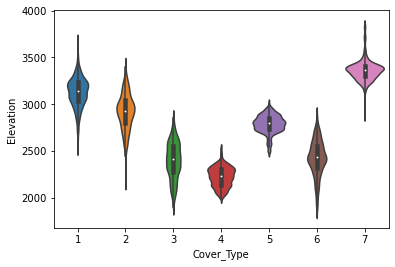

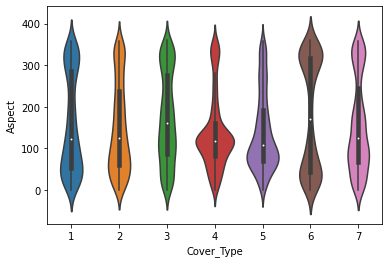

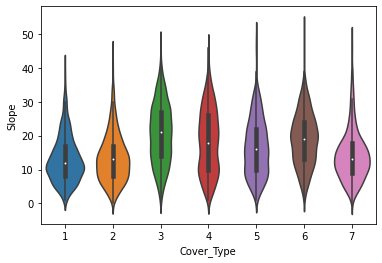

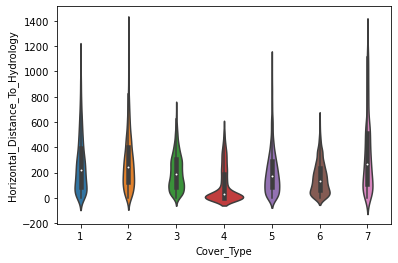

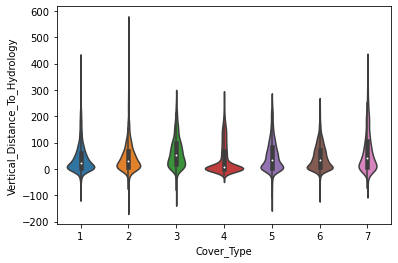

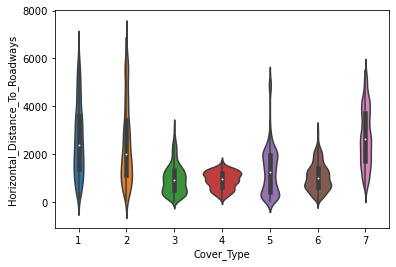

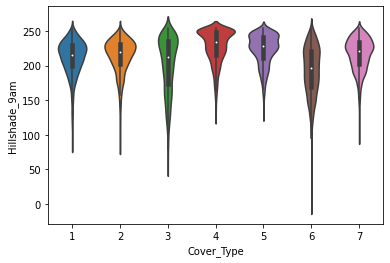

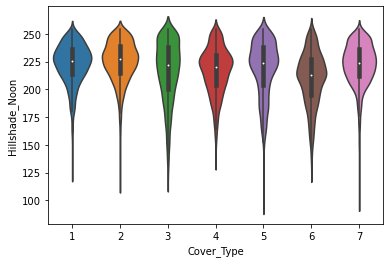

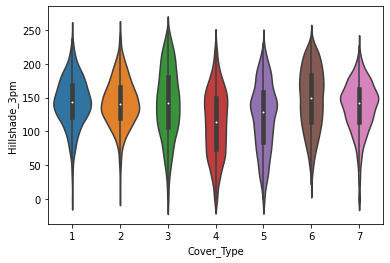

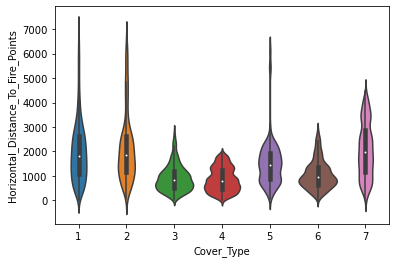

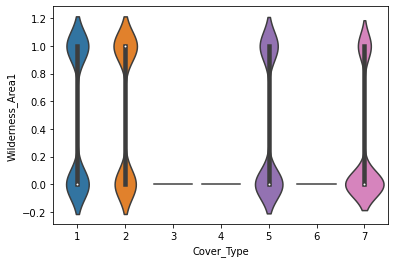

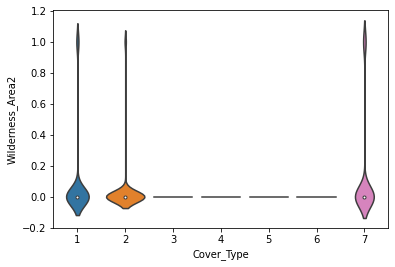

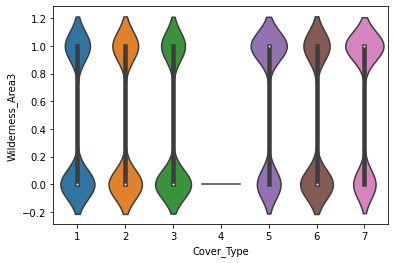

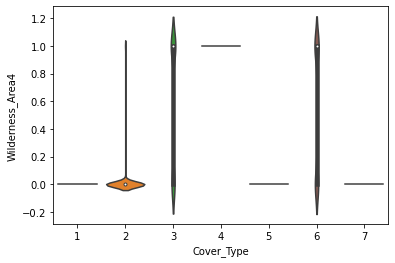

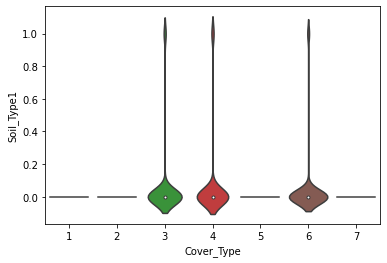

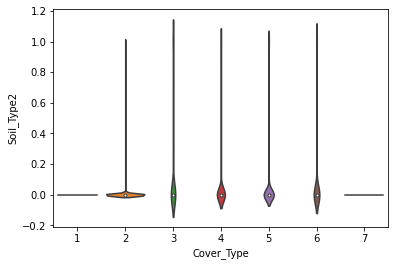

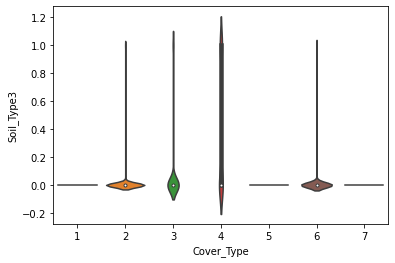

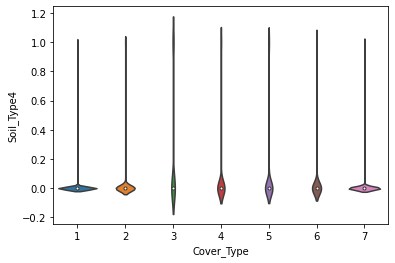

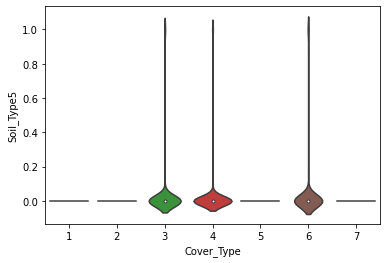

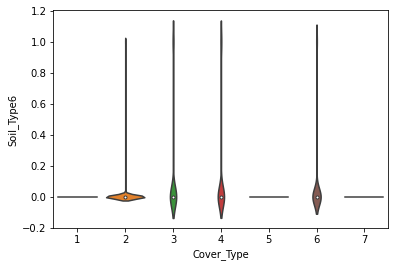

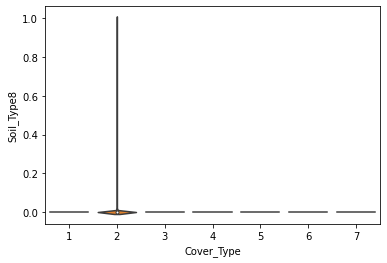

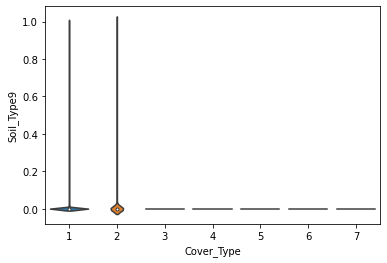

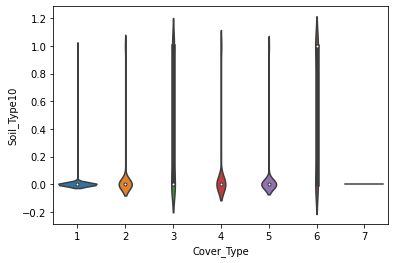

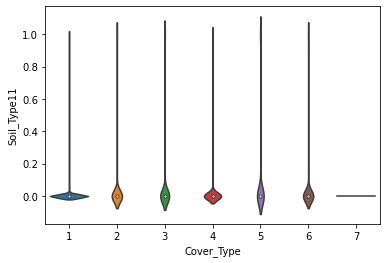

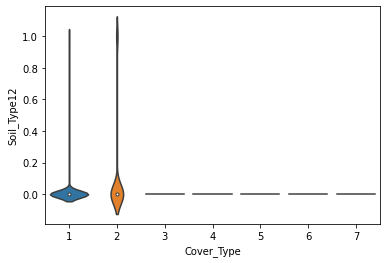

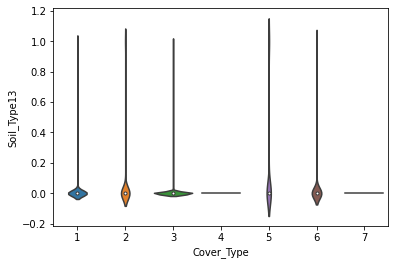

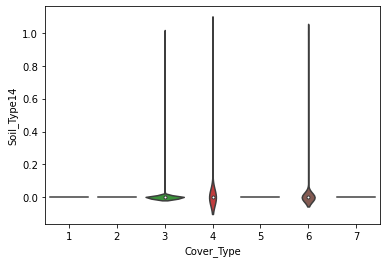

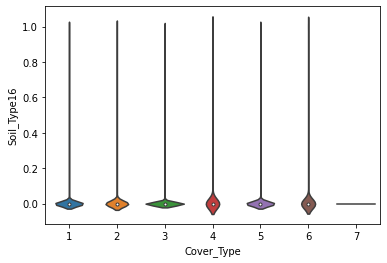

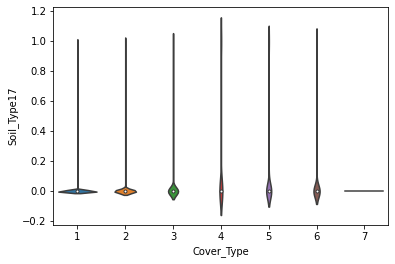

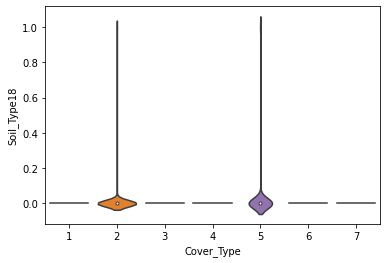

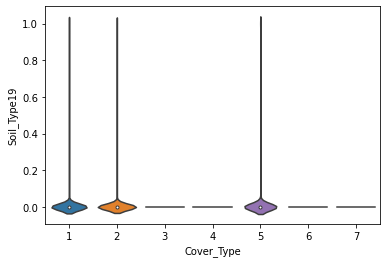

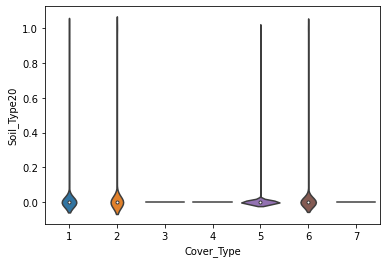

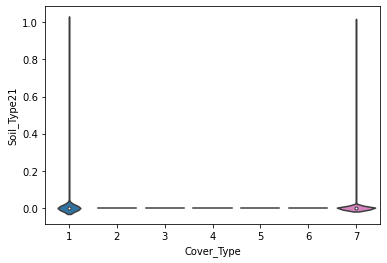

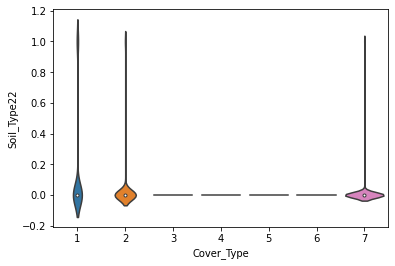

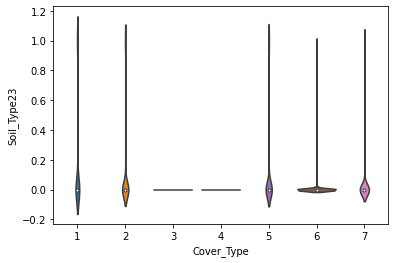

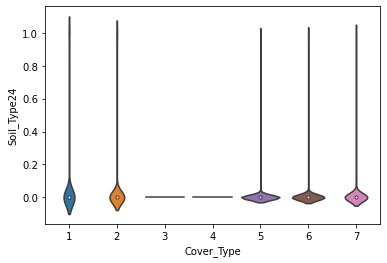

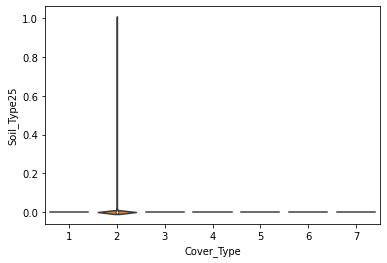

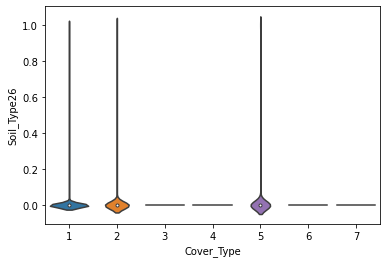

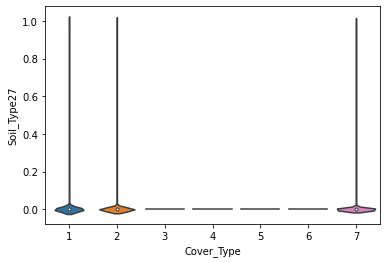

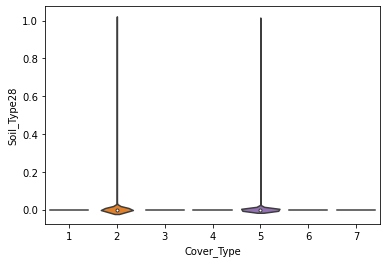

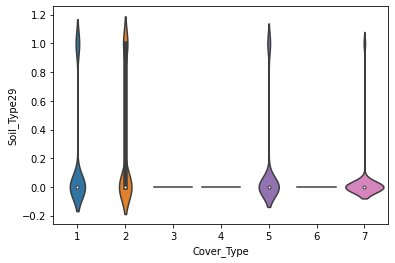

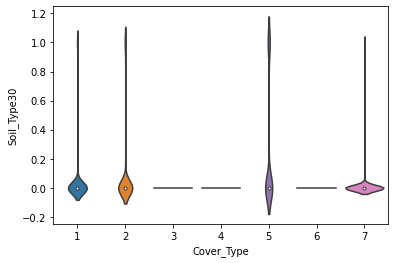

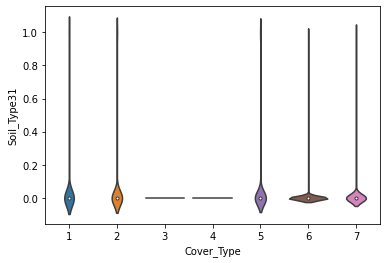

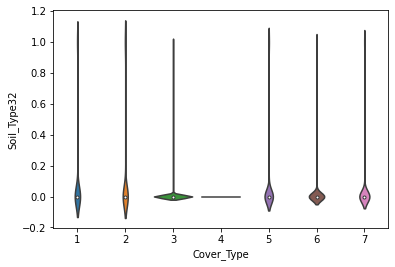

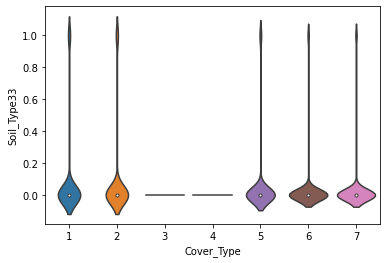

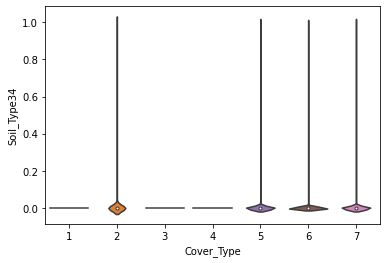

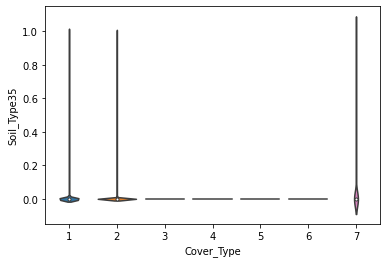

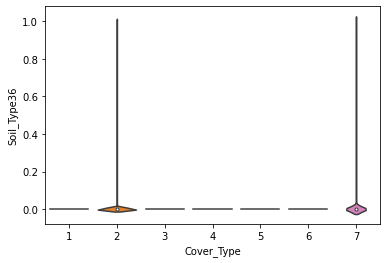

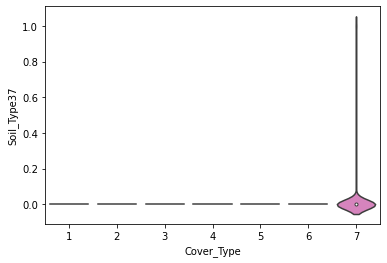

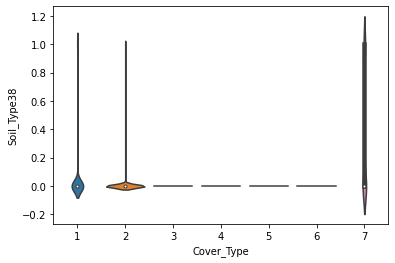

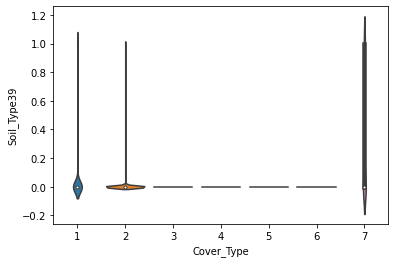

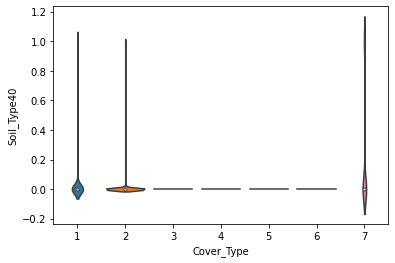

In [8]:
# Dropping the columns Soil_Type7 and Soil_Type15
train.drop(['Soil_Type7','Soil_Type15'],1,inplace=True)

# Plotting a violinplot between every feature and target
for i in range(0,len(train.columns)-1):
    sns.violinplot(data=train,x=train.iloc[:,-1],y=train[train.columns[i]])
    plt.show()

<AxesSubplot:>

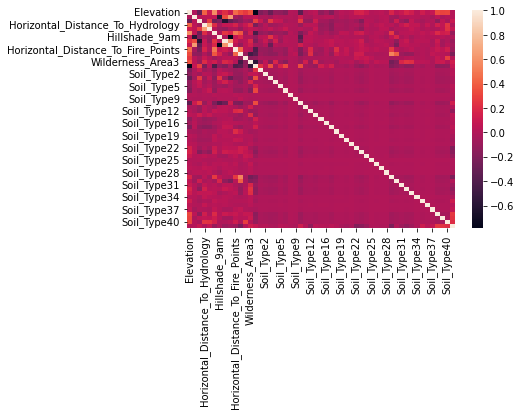

In [9]:
# Plotting a heatmap using to check for correlation between the features
sns.heatmap(train.corr())

In [10]:
# Selecting upper and lower threshold
upper_threshold = 0.5
lower_threshold = -0.5


# List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')

# Select the highest correlation pairs having correlation greater than upper threshold and lower than lower threshold
corr_var_list = correlation[((correlation>upper_threshold) | (correlation<lower_threshold)) & (correlation!=1)]
print(corr_var_list)

Wilderness_Area4                  Elevation                          -0.783651
Elevation                         Wilderness_Area4                   -0.783651
Hillshade_9am                     Hillshade_3pm                      -0.779965
Hillshade_3pm                     Hillshade_9am                      -0.779965
Slope                             Hillshade_Noon                     -0.612613
Hillshade_Noon                    Slope                              -0.612613
Hillshade_9am                     Aspect                             -0.593997
Aspect                            Hillshade_9am                      -0.593997
Wilderness_Area4                  Wilderness_Area3                   -0.569200
Wilderness_Area3                  Wilderness_Area4                   -0.569200
Wilderness_Area1                  Soil_Type29                         0.546309
Soil_Type29                       Wilderness_Area1                    0.546309
Horizontal_Distance_To_Roadways   Elevation         

In [15]:
# Split into features and target
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

# Separate into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Fitting a Random Forest model on the train data and predict on the test data.
model = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=4)
rfe =RFE(estimator=LogisticRegression(), n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe,y_train)
y_Pred_rfe = model.predict(X_test_rfe)
print(accuracy_score(y_test,y_Pred_rfe))



0.8647486772486772


In [21]:
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','Soil_Type7','Soil_Type15'],1,inplace=True)

# Applying rfe on test data
test_rfe = rfe.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_rfe)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Cover_Type':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)